Data Science Job Salaries Dataset contains 11 columns, each are:

- work_year: The year the salary was paid.
- experience_level: The experience level in the job during the year
- employment_type: The type of employment for the role
- job_title: The role worked in during the year.
- salary: The total gross salary amount paid.
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
- salaryinusd: The salary in USD
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio: The overall amount of work done remotely
- company_location: The country of the employer's main office or contracting branch
- company_size: The median number of people that worked for the company during the year

📜 Table Of Contents:

- Gathering and Observing Data
- Data Visualization
    - I. Top 10 Jobs For Each Work Year
    - II. Top 3 Jobs for Experience Level
    - III. Employment Type
    - IV. Salary Distributions
    - V. Average Salaries
    - VI. Remote Ratio
    - VII. Top 10 Countries with The Most Employees

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns

### Gathering and Observing Data

In [2]:
df = pd.read_csv("/Users/sajanshergill/Downloads/ds_salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
def show_table(data, head=5):
    print("\n******Shape******")
    print(f'Shape     : {df.shape}\n'
          f'Size      : {df.size}\n' 
          f'Dimension : {df.ndim}')
    print("\n******Types******")
    print(data.dtypes)
    print("\n******Head******")
    print(data.head(head))
    print("\n******Tail******")
    print(data.tail(head))
    print("\n******Random Sampling******")
    print(data.sample(head))
    print("\n******Missing Values******")
    print(data.isnull().sum())
    print("\n******Duplicated Values******")
    print(data.duplicated().sum())
    print("\n******Unique Values******")
    print(data.nunique())
    print("\n******Describe******")
    print(data.describe().T)
    print("\n******Object Describe******")
    print(data.describe(include=['O']).T)

In [6]:
show_table(df)


******Shape******
Shape     : (3755, 11)
Size      : 41305
Dimension : 2

******Types******
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

******Head******
   work_year experience_level employment_type                 job_title  salary salary_currency  salary_in_usd employee_residence  remote_ratio company_location company_size
0       2023               SE              FT  Principal Data Scientist   80000             EUR          85847                 ES           100               ES            L
1       2023               MI              CT               ML Engineer   30000             USD          30000                 US           100               US            S
2       2023               MI     

In [7]:
df.loc[df.duplicated(), :]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
    cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    cat_cols = cat_cols+num_but_cat
    num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f'Observations {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [9]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations 3755
Variables: 11
cat_cols: 6
num_cols: 2
cat_but_car: 3
num_but_cat: 2


### Data Visualization 

In [11]:
df['experience_level'] = df['experience_level'].replace(['EN', 'MI', 'SE', 'EX'], 
                                                        ['Entry-Level', 'Mid-Level', 'Senior-Level', 'Executive-Level'])
df['employment_type'] = df['employment_type'].replace(['PT', 'FT', 'FL', 'CT'], 
                                                      ['Part-Time', 'Full-Time', 'Freelance', 'Contract'])
df['remote_ratio'] = df['remote_ratio'].replace([0, 50, 100], 
                                                ['On-Site', 'Hybrid', 'Remote'])
df['company_size'] = df['company_size'].replace(['S', 'M', 'L'], 
                                                ['Small', 'Medium', 'Large'])

### I. Top 10 Jobs For Each Work Year

/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_47004/3044720919.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_47004/3044720919.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_47004/3044720919.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_47004/3044720919.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

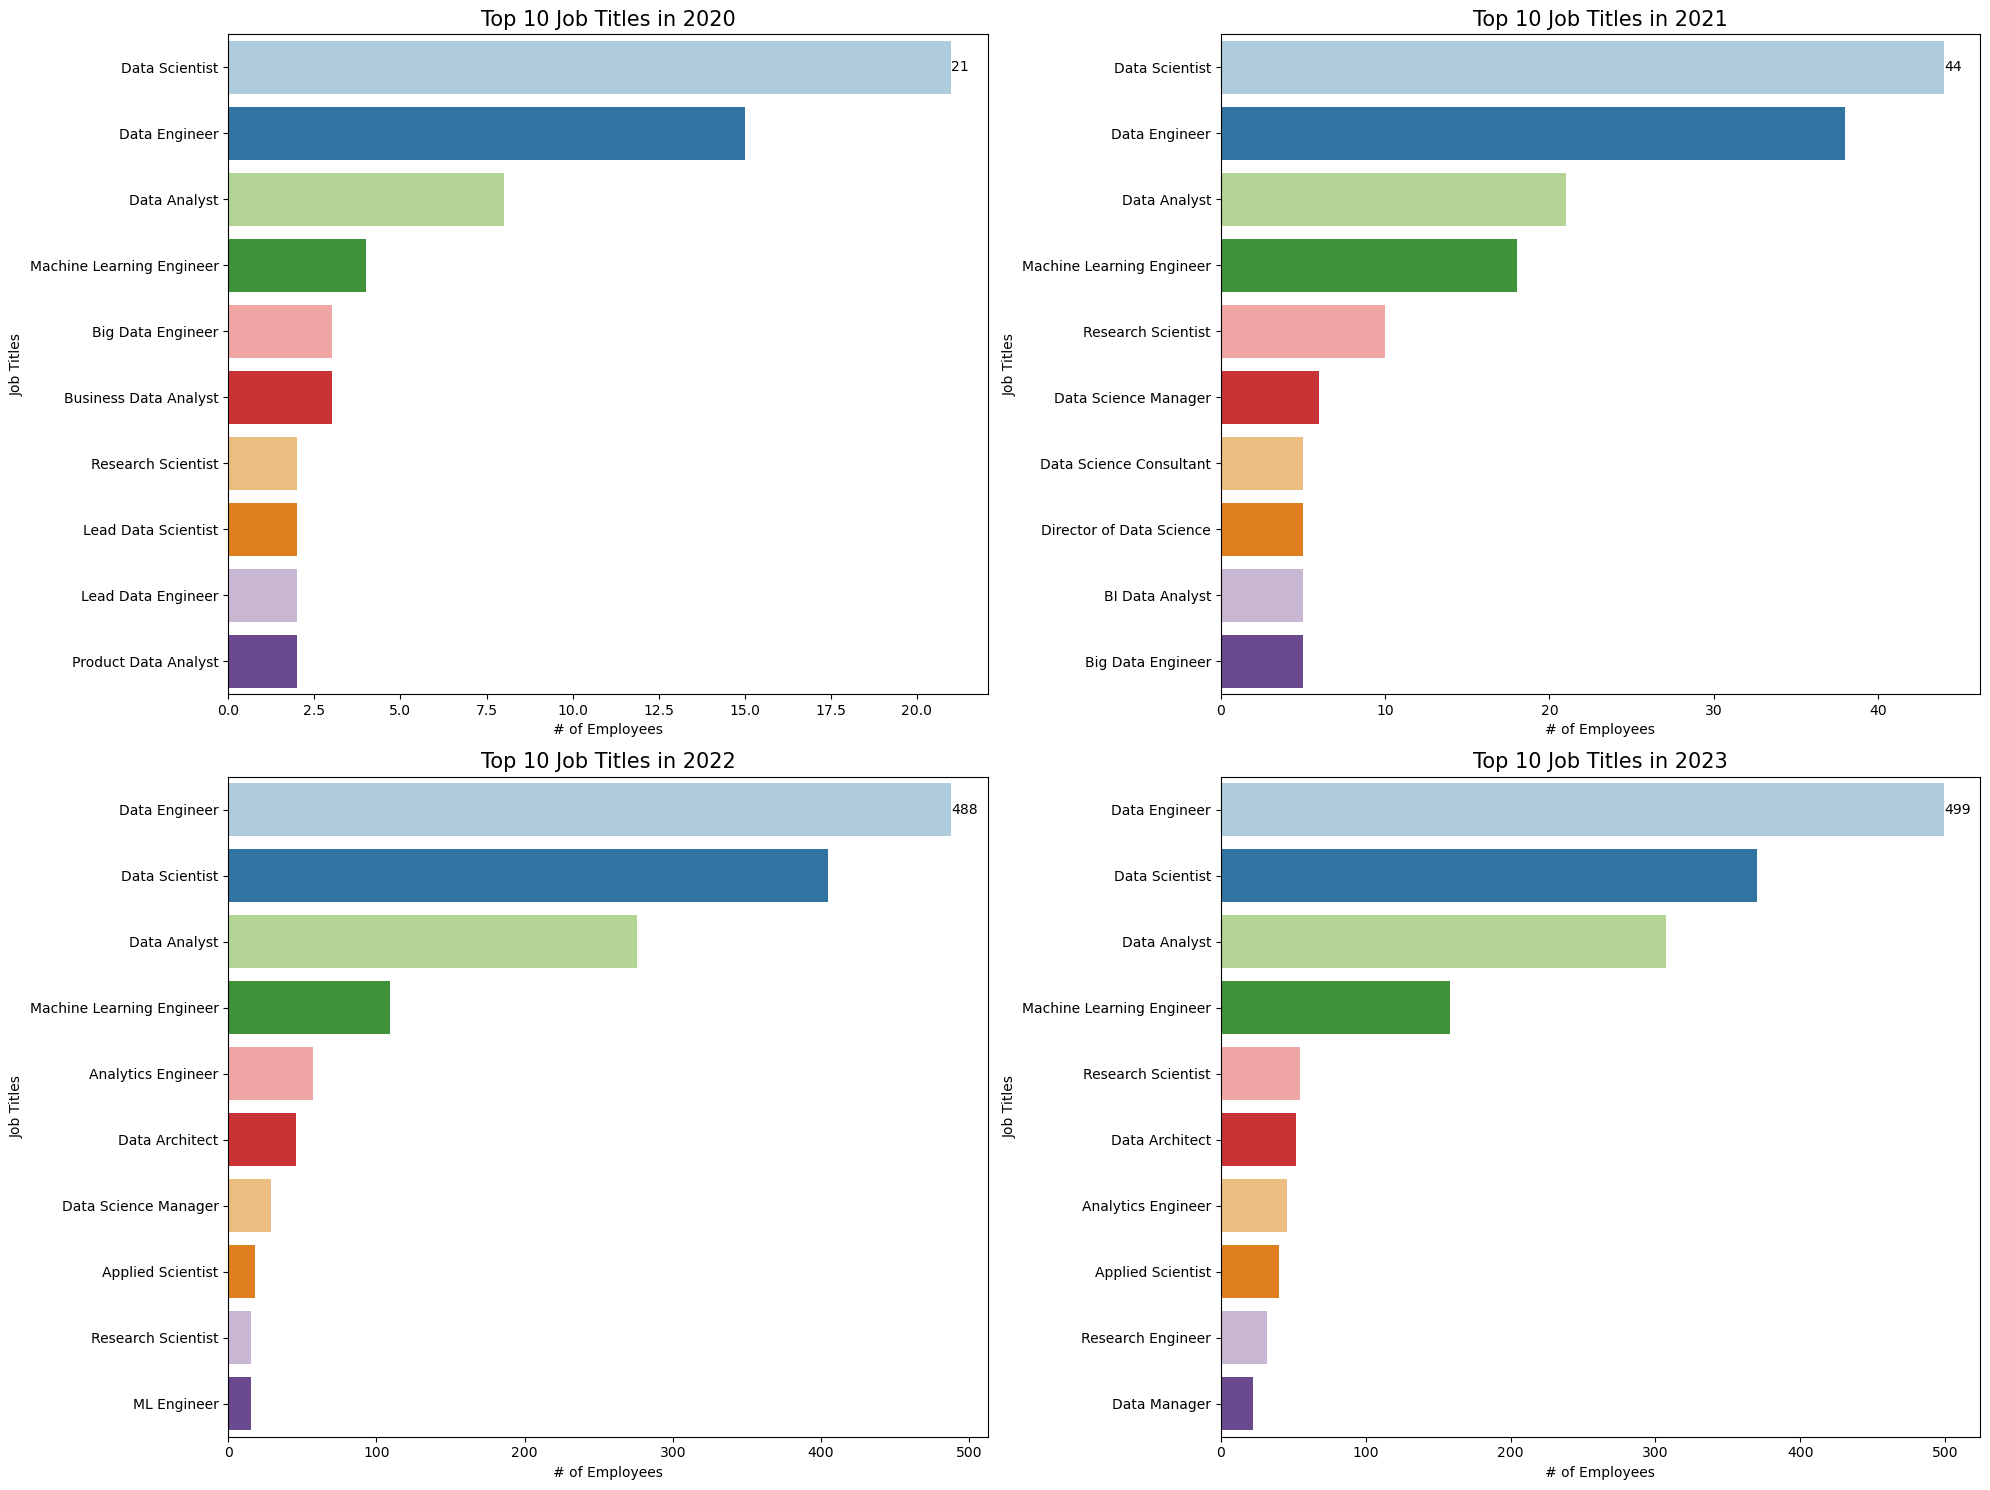

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

years = sorted(df['work_year'].unique())

# Make a grid big enough for all years (2 cols)
n_years = len(years)
n_cols = 2
n_rows = math.ceil(n_years / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()  # so we can index with a single counter

for idx, year in enumerate(years):
    # Top 10 job titles for that year
    dft = (
        df[df['work_year'] == year]['job_title']
        .value_counts()
        .nlargest(10)
        .reset_index(name='count')          # index -> job_title, count -> frequency
        .rename(columns={'index': 'job_title'})
    )
    ax = axes[idx]

    sns.barplot(
        data=dft,
        y='job_title',
        x='count',
        palette="Paired",
        ax=ax
    )

    ax.set_ylabel('Job Titles')
    ax.set_xlabel('# of Employees')
    ax.set_title(f'Top 10 Job Titles in {year}', size=15)
    ax.bar_label(ax.containers[0], size=10)

# Hide any empty subplots (if years not multiple of 2)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### II. Top 3 Jobs for Experience Level

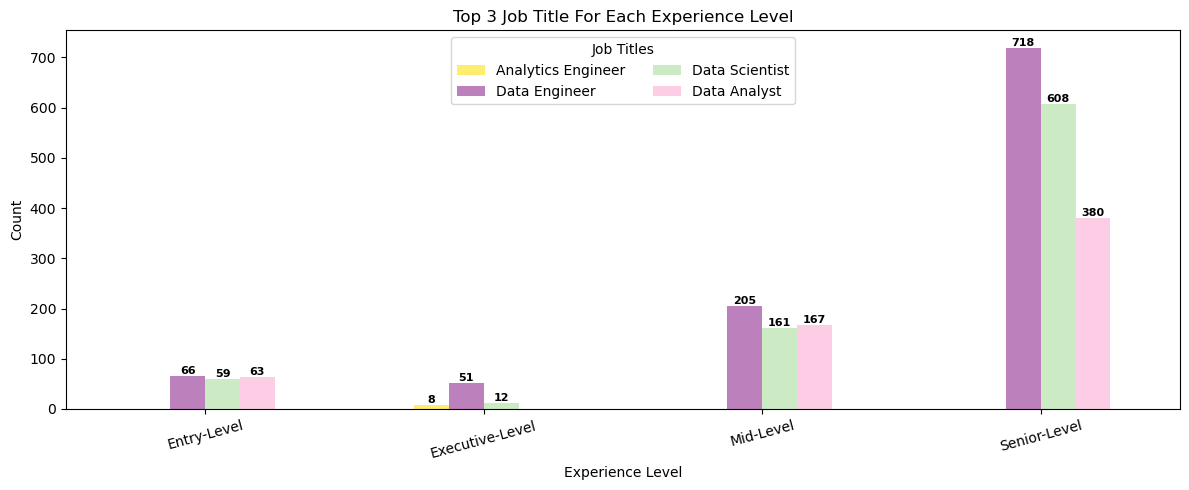

In [17]:
dft = (
    df.groupby(['experience_level'])['job_title']
      .value_counts()
      .groupby(level=0, group_keys=False)
      .head(3)
)

label_order = ['Analytics Engineer', 'Data Engineer', 'Data Scientist', 'Data Analyst']

palette_set3 = sns.color_palette("Set3")
palette = sns.color_palette([palette_set3[11], palette_set3[9],
                             palette_set3[10], palette_set3[7]])

ax = (
    dft.unstack(level=1)[label_order]
    .plot(kind='bar', figsize=(12,5), color=palette)
)

ax.legend(loc='upper center', ncol=2, title="Job Titles")

for p in ax.patches:
    if p.get_height() != 0:
        ax.text(
            p.get_x() + p.get_width()/2,
            p.get_height() + 10,
            int(p.get_height()),
            ha='center',
            va='center',
            size=8,
            weight='bold'
        )

plt.title("Top 3 Job Title For Each Experience Level")
plt.xticks(rotation=15, ha="center")
plt.ylabel("Count")
plt.xlabel("Experience Level")
plt.tight_layout()
plt.show()


### III. Employment Type

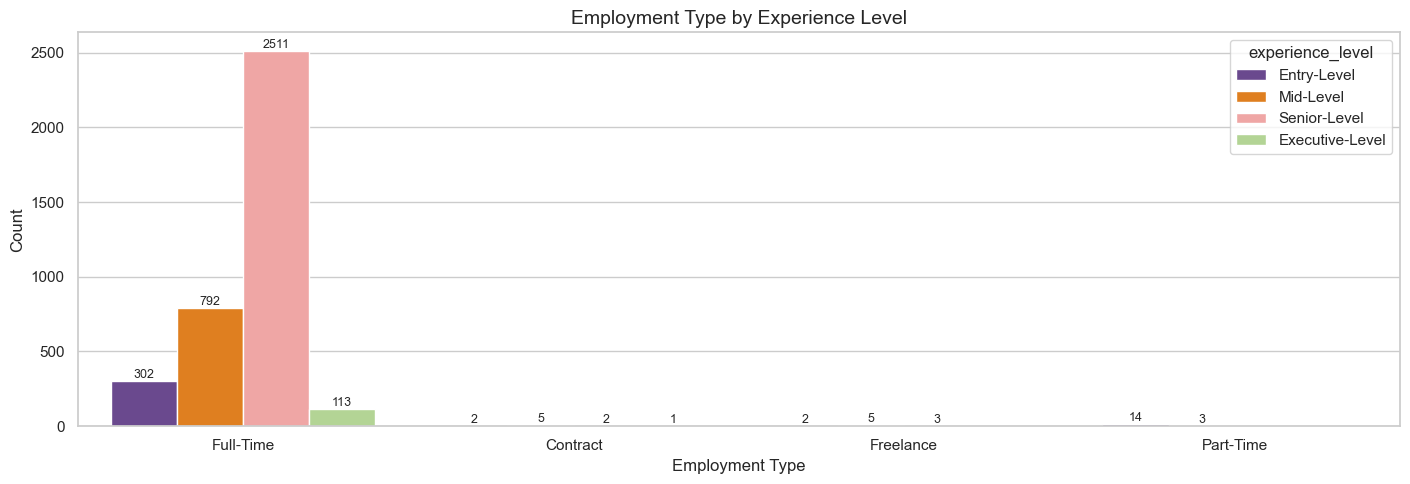

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set a style
sns.set(style="whitegrid")

# Order for experience levels (must match values in df['experience_level'])
exp_order = ['Entry-Level', 'Mid-Level', 'Senior-Level', 'Executive-Level']

plt.figure(figsize=(14.26, 5))

ax = sns.countplot(
    data=df,
    x='employment_type',          # <-- fixed spelling
    hue='experience_level',
    hue_order=exp_order,          # uses the order above
    palette='Paired_r'
)

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fontsize=9)

plt.xlabel("Employment Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Employment Type by Experience Level", fontsize=14)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### IV. Salary Distributions

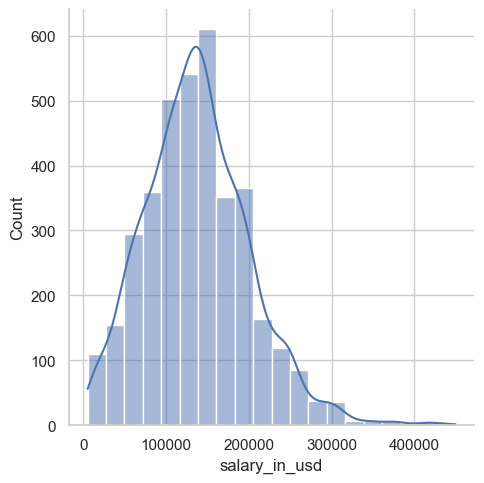

In [20]:
sns.displot(data=df, x='salary_in_usd', kde=True, bins=20);

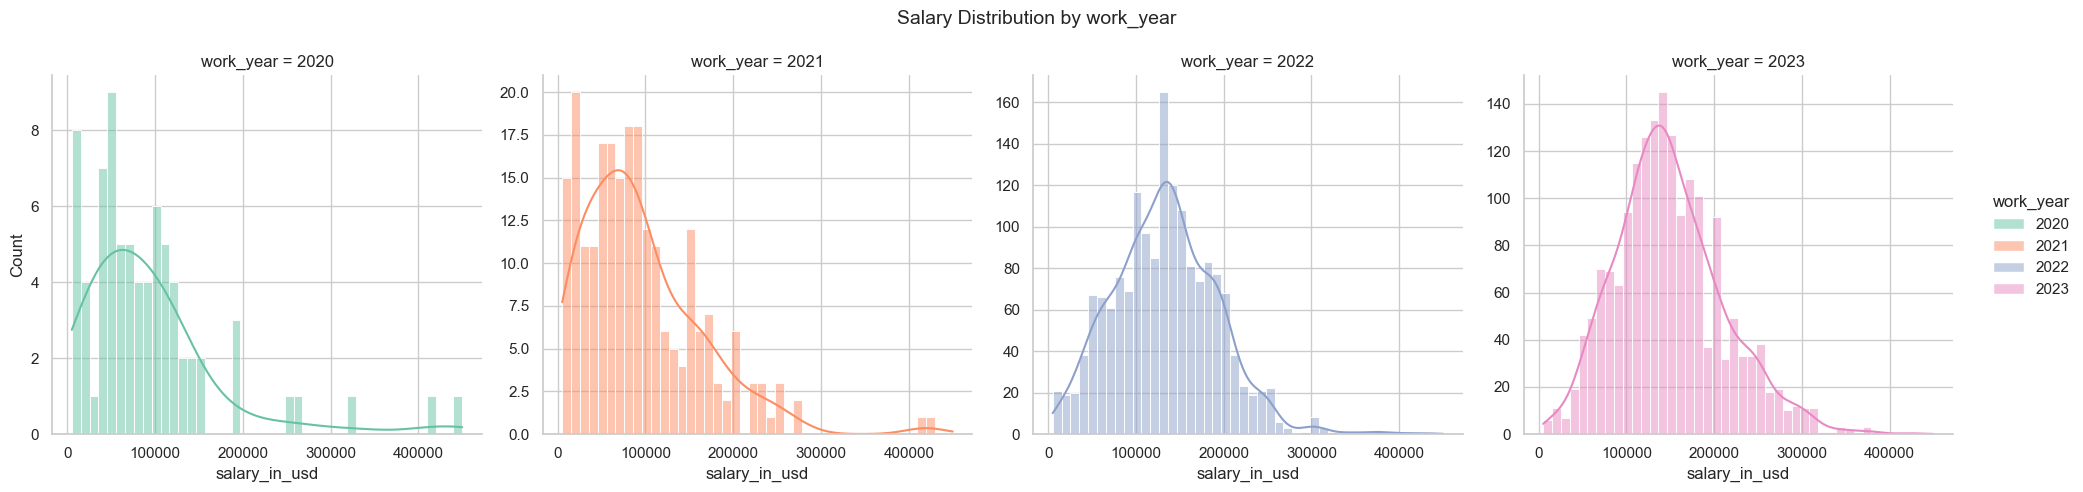

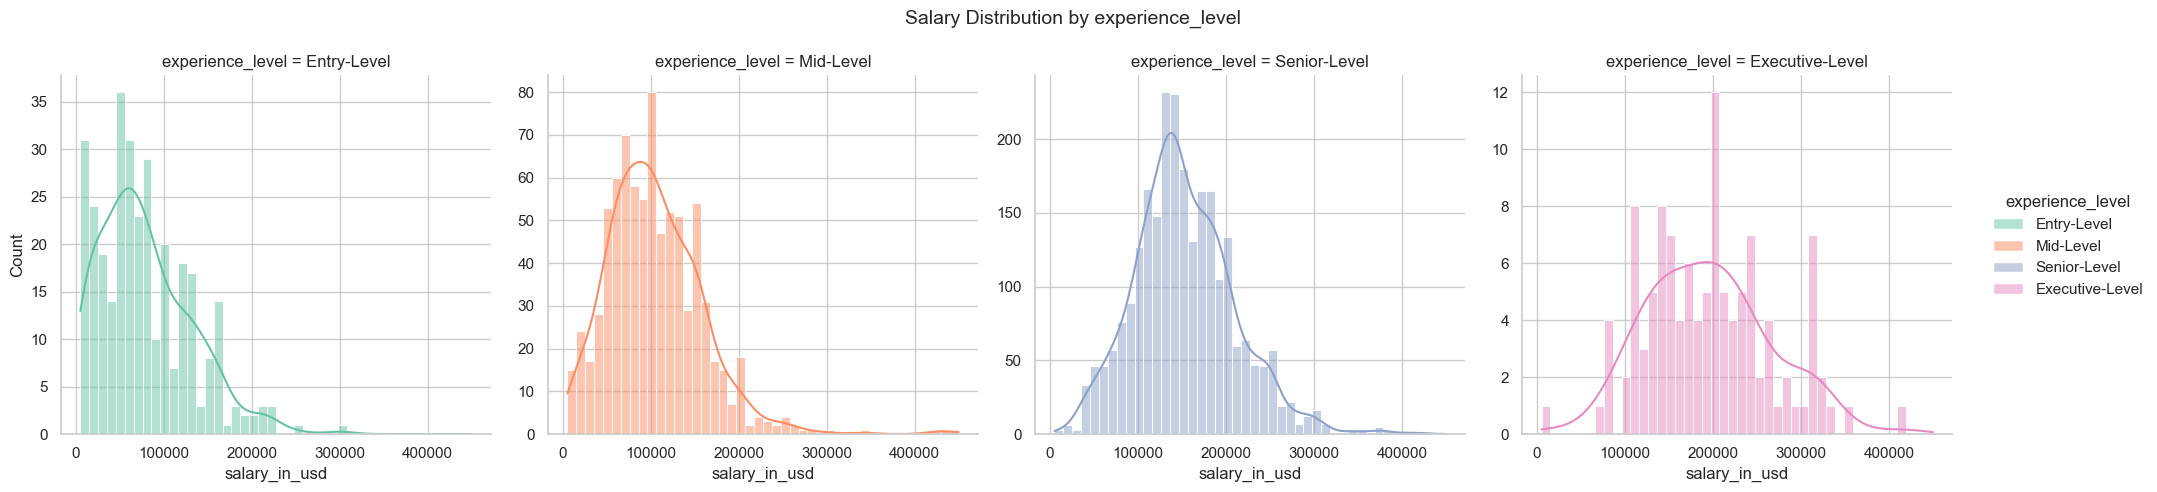

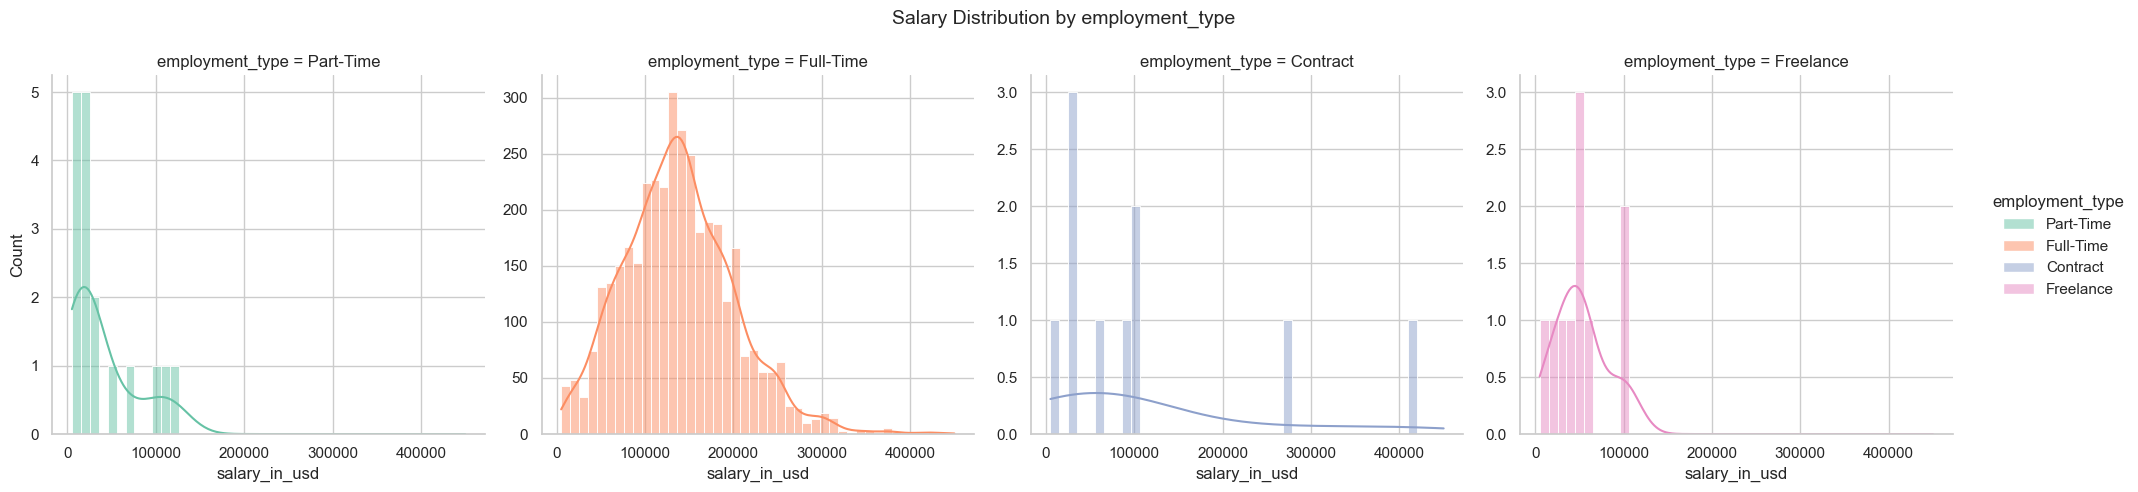

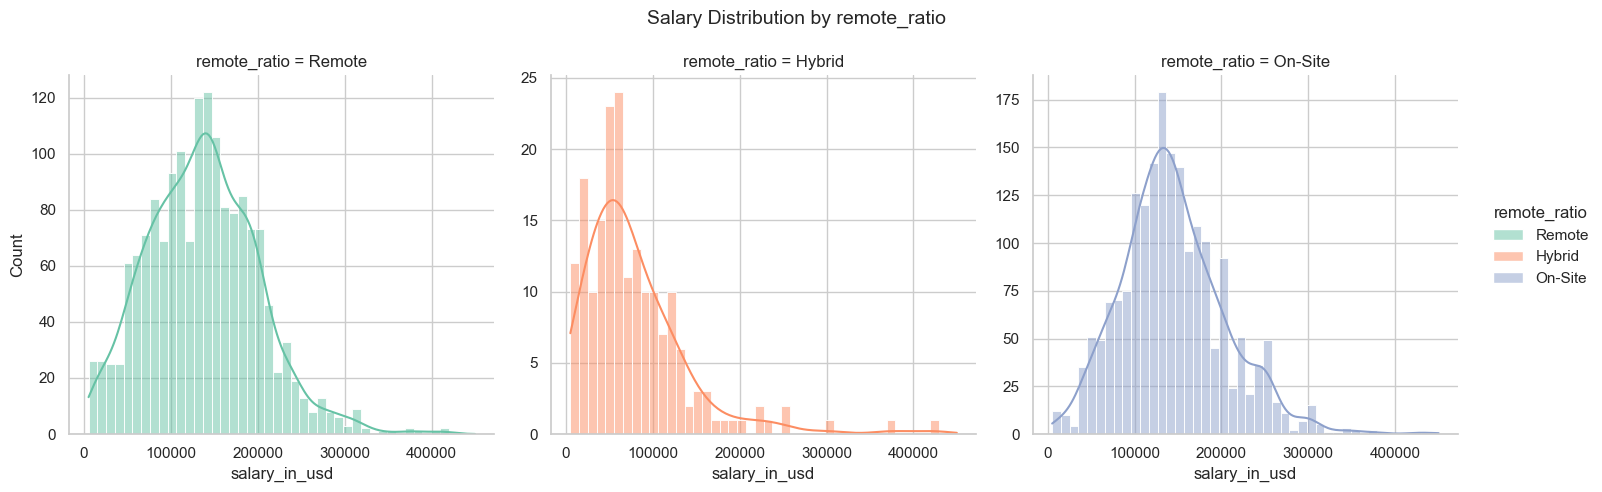

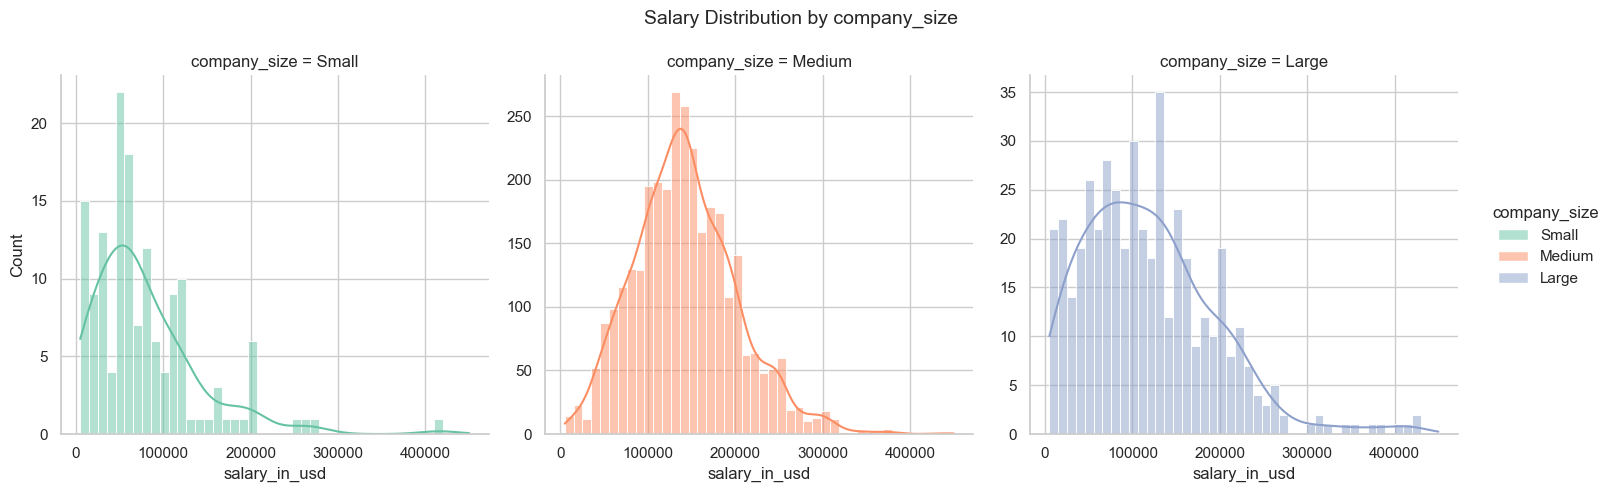

In [22]:
hues_cols_orders = {
    'work_year': None,
    'experience_level': ['Entry-Level', 'Mid-Level', 'Senior-Level', 'Executive-Level'],
    'employment_type': ['Part-Time', 'Full-Time', 'Contract', 'Freelance'],
    'remote_ratio': ['Remote', 'Hybrid', 'On-Site'],
    'company_size': ['Small', 'Medium', 'Large']
}

for hue_col, order in hues_cols_orders.items():

    dist = sns.displot(
        data=df,
        x='salary_in_usd',
        hue=hue_col,          # <-- FIXED
        col=hue_col,
        hue_order=order if order else None,
        col_order=order if order else None,
        palette='Set2',
        kde=True,
        facet_kws={'sharey': False}
    )

    dist.fig.subplots_adjust(top=0.85)
    dist.fig.suptitle(f"Salary Distribution by {hue_col}", fontsize=14)


### V. Average Saleries

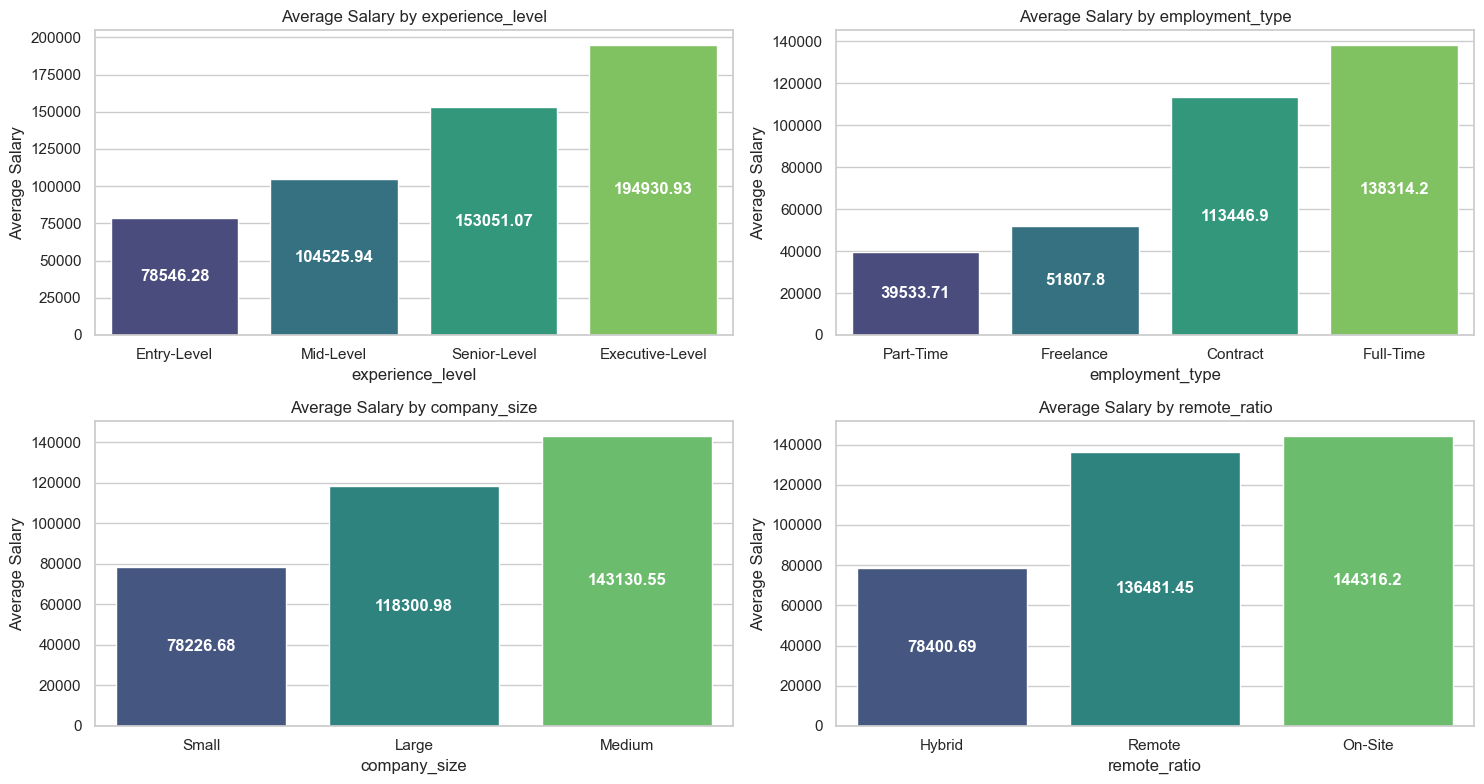

In [24]:
columns= ['experience_level', 'employment_type', 'company_size', 'remote_ratio']
fig = plt.figure(figsize=(15,8))

a,b,c = 2,2,1

for col in columns:
    
    dft = (df.groupby(col, as_index=False)
             .agg({'salary_in_usd':'mean'})
             .sort_values(by='salary_in_usd')
             .reset_index(drop=True))

    plt.subplot(a,b,c)

    ax = sns.barplot(
        data=dft,
        x=col,
        y='salary_in_usd',
        hue=col,          # 👈 fixes future warning
        legend=False,     # 👈 hides duplicate legend
        palette="viridis" # 👈 auto handles any number of categories
    )

    # Add values on bars
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height/2,
            f"{round(height,2)}",
            ha='center',
            va='center',
            color='white',
            weight='bold'
        )

    plt.title(f"Average Salary by {col}")
    plt.ylabel("Average Salary")
    plt.xlabel(col)

    c += 1

plt.tight_layout()
plt.show()


### VI. Remote Ratio

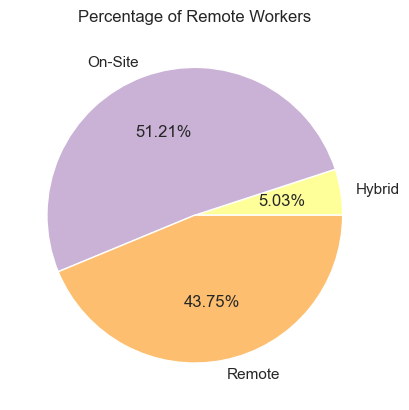

In [25]:
ax = df.groupby(['remote_ratio'])['work_year'].count().plot.pie(explode=[0,0,0],
                                                                ylabel='',
                                                                autopct='%.2f%%',
                                                                colors = sns.color_palette('Paired_r'))
ax.set_title("Percentage of Remote Workers");

### VII. Top 10 Countries with the Most Employees

/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_47004/2147568843.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='employee_residence', palette='magma_r', order=order)


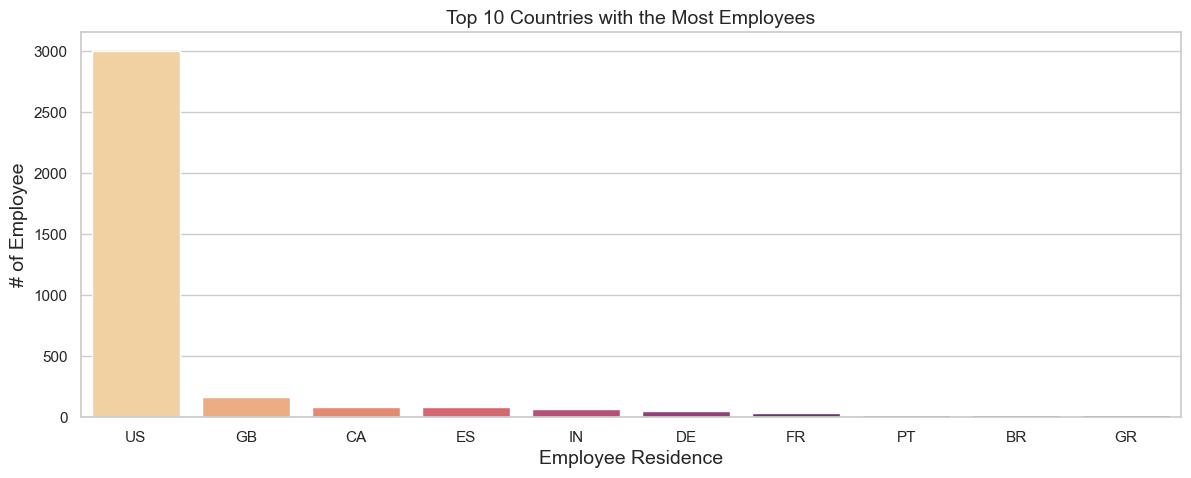

In [26]:
fig = plt.figure(figsize =(14.2, 5))

order = df.employee_residence.value_counts().iloc[:10].index
sns.countplot(data=df, x='employee_residence', palette='magma_r', order=order)

plt.xlabel("Employee Residence", size=14)
plt.ylabel("# of Employee", size=14)
plt.title('Top 10 Countries with the Most Employees', fontsize=14);